In [176]:
import pandas as pd

In [177]:
df = pd.read_csv('data_tr_apo.csv')

In [178]:
df.head()

,datetime,구미 아포배수지 유출유량 적산차
0,2017-01-01 01:00:00,131.0
1,2017-01-01 02:00:00,64.0
2,2017-01-01 03:00:00,52.0
3,2017-01-01 04:00:00,50.0
4,2017-01-01 05:00:00,49.0


In [179]:
df.columns=['datetime','diff']

In [180]:
df

,datetime,diff
0,2017-01-01 01:00:00,131.0
1,2017-01-01 02:00:00,64.0
2,2017-01-01 03:00:00,52.0
3,2017-01-01 04:00:00,50.0
4,2017-01-01 05:00:00,49.0
...,...,...
35058,2020-12-31 19:00:00,237.0
35059,2020-12-31 20:00:00,92.0
35060,2020-12-31 21:00:00,82.0
35061,2020-12-31 22:00:00,82.0


In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
import numpy as np

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35063 non-null  object 
 1   diff      35052 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


In [184]:
df.dropna(axis=0, inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35052 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35052 non-null  object 
 1   diff      35052 non-null  float64
dtypes: float64(1), object(1)
memory usage: 821.5+ KB


In [186]:
df['datetime']= pd.to_datetime(df['datetime'])

In [187]:
df.head()

,datetime,diff
0,2017-01-01 01:00:00,131.0
1,2017-01-01 02:00:00,64.0
2,2017-01-01 03:00:00,52.0
3,2017-01-01 04:00:00,50.0
4,2017-01-01 05:00:00,49.0


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35052 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35052 non-null  datetime64[ns]
 1   diff      35052 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 821.5 KB


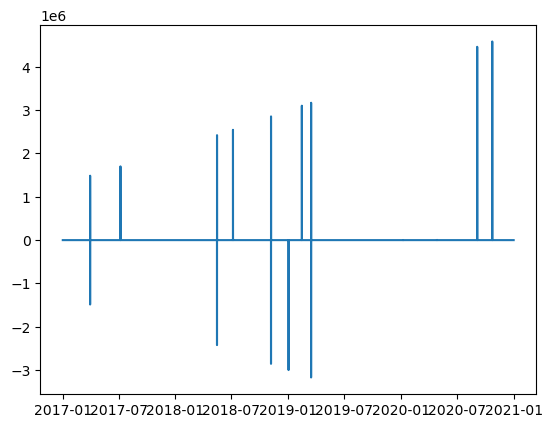

In [189]:
plt.plot(df['datetime'],df['diff'])

In [192]:
df['datetime'].min(), df['datetime'].max()

(Timestamp('2017-01-01 01:00:00'), Timestamp('2020-12-31 23:00:00'))

In [194]:
df['datetime'].max() - df['datetime'].min()

Timedelta('1460 days 22:00:00')

In [190]:
df['month']=df['datetime'].dt.month

In [195]:
df.head()

,datetime,diff,month
0,2017-01-01 01:00:00,131.0,1
1,2017-01-01 02:00:00,64.0,1
2,2017-01-01 03:00:00,52.0,1
3,2017-01-01 04:00:00,50.0,1
4,2017-01-01 05:00:00,49.0,1


In [196]:
df['year']=df['datetime'].dt.year

In [197]:
df['day']=df['datetime'].dt.day

In [198]:
df['hour']=df['datetime'].dt.hour

In [199]:
df['day_name']=df['datetime'].dt.day_name()

In [200]:
df.head()

,datetime,diff,month,year,day,hour,day_name
0,2017-01-01 01:00:00,131.0,1,2017,1,1,Sunday
1,2017-01-01 02:00:00,64.0,1,2017,1,2,Sunday
2,2017-01-01 03:00:00,52.0,1,2017,1,3,Sunday
3,2017-01-01 04:00:00,50.0,1,2017,1,4,Sunday
4,2017-01-01 05:00:00,49.0,1,2017,1,5,Sunday


In [203]:
df.groupby(['year'])['diff'].mean()

year
2017     288.439356
2018     393.273527
2019     110.842316
2020    1132.780916
Name: diff, dtype: float64

<AxesSubplot:xlabel='year'>

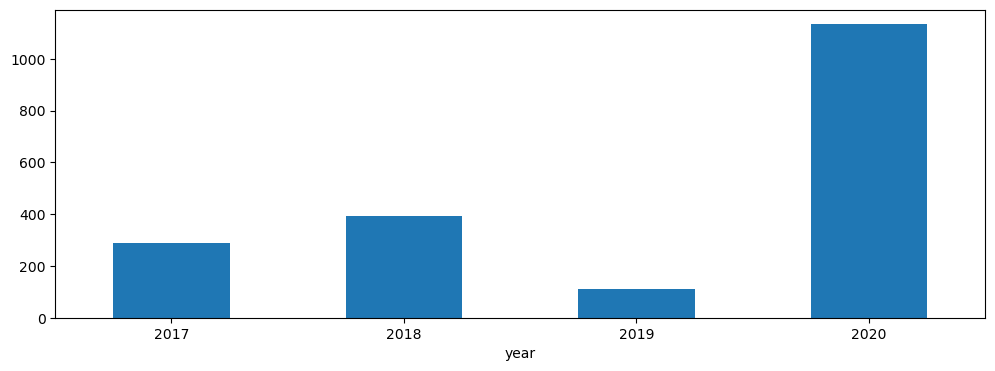

In [204]:
fig,axs = plt.subplots(figsize=(12,4))
df.groupby(['year'])['diff'].mean().plot(kind='bar',rot=0, ax=axs)

In [205]:
df.groupby(['month'])['diff'].mean()

month
1     -907.939832
2     1245.348708
3       98.069603
4       96.423611
5       98.456989
6      101.239055
7     1528.511268
8      101.822581
9     1649.579514
10    1638.436492
11      99.903125
12     100.411903
Name: diff, dtype: float64

<AxesSubplot:xlabel='month'>

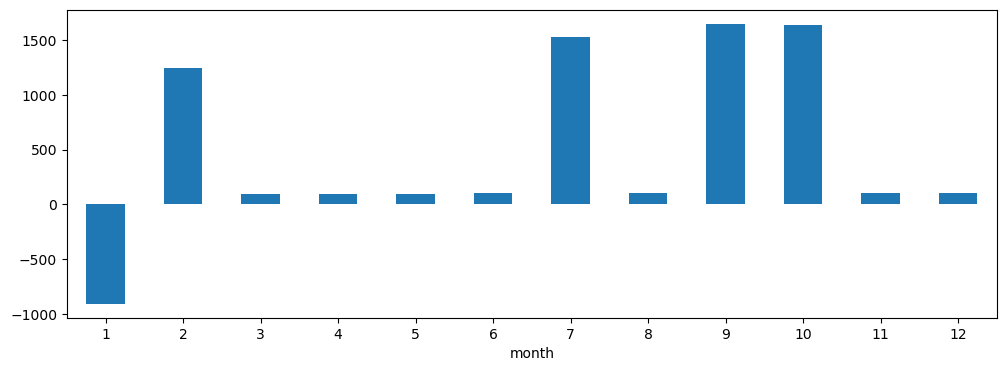

In [206]:
fig,axs = plt.subplots(figsize=(12,4))
df.groupby(['month'])['diff'].mean().plot(kind='bar',rot=0, ax=axs)

In [208]:
df.groupby(['year','month'])['diff'].mean()

year  month
2017  1          98.884253
      2          97.739583
      3         102.001348
      4          89.668056
      5          92.778226
      6          92.591667
      7        2381.823688
      8          90.063172
      9          91.697222
      10         92.255376
      11         94.566667
      12         95.475806
2018  1          98.244624
      2         113.604167
      3          99.259409
      4          95.155556
      5          97.294355
      6         100.293872
      7        3535.907008
      8         107.791667
      9         103.637500
      10        100.268817
      11        104.516667
      12        106.178763
2019  1       -3929.370968
      2        4712.706845
      3          94.923387
      4          96.661111
      5         102.827957
      6         105.512500
      7          99.754032
      8         101.013441
      9          99.180556
      10         96.327957
      11         98.227778
      12         96.233154
2020  1         

<AxesSubplot:xlabel='year,month'>

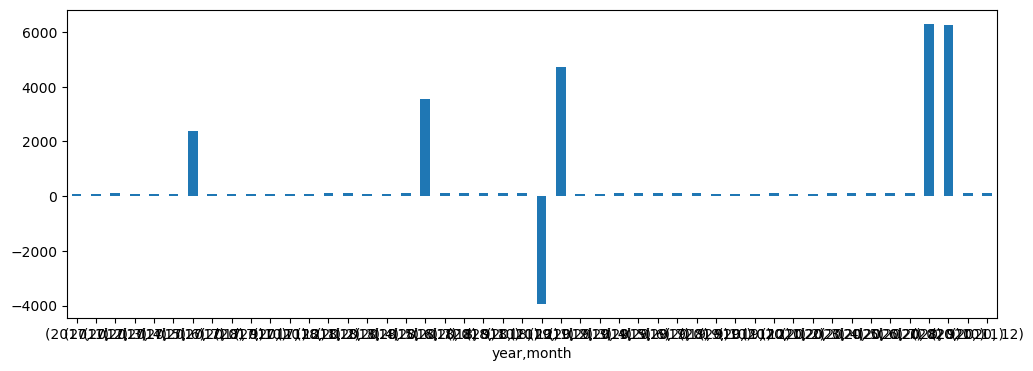

In [212]:
fig, axs = plt.subplots(figsize=(12,4))
df.groupby(['year','month'])['diff'].mean().plot(kind='bar',rot=0, ax=axs)